In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from FT_model import FTConvLearner, utils

Using TensorFlow backend.


In [2]:
%matplotlib inline

### 准备数据

In [3]:
batch_size = 32
model_save_dir = './models/'
target_size = (224, 224)
trn_path = ''
val_path = ''
tst_path = ''

In [4]:
batches = utils.get_batches(trn_path, target_size, batch_size=batch_size, tfms=utils.DEFAULT_TFMS, shuffle=True)
valid_batches = utils.get_batches(val_path, target_size, batch_size=batch_size, shuffle=False)
test_batches = utils.get_batches(tst_path, target_size, batch_size=batch_size, shuffle=False)

Found 5326 images belonging to 2 classes.
Found 388 images belonging to 2 classes.
Found 388 images belonging to 2 classes.


### 开始Fine tunning

In [5]:
ftmodel = FTConvLearner(batches.class_indices, use_model_name='xception')
ftmodel.finetuning(batches, valid_batches, epochs=5)

Epoch 1/5
166/166 [==============================] - 46s 278ms/step - loss: 0.4086 - acc: 0.8339 - val_loss: 0.3321 - val_acc: 0.8828
Epoch 2/5
166/166 [==============================] - 45s 272ms/step - loss: 0.2788 - acc: 0.8922 - val_loss: 0.2379 - val_acc: 0.9297
Epoch 3/5
166/166 [==============================] - 45s 271ms/step - loss: 0.2546 - acc: 0.9051 - val_loss: 0.2358 - val_acc: 0.9193
Epoch 4/5
166/166 [==============================] - 45s 270ms/step - loss: 0.2293 - acc: 0.9156 - val_loss: 0.2214 - val_acc: 0.9141
Epoch 5/5
166/166 [==============================] - 45s 274ms/step - loss: 0.2296 - acc: 0.9137 - val_loss: 0.2311 - val_acc: 0.9036


In [6]:
ftmodel.save(model_save_dir)

### 评估模型性能

In [7]:
y_prob, y_pred = ftmodel.predict_g(test_batches)
y_true = test_batches.classes

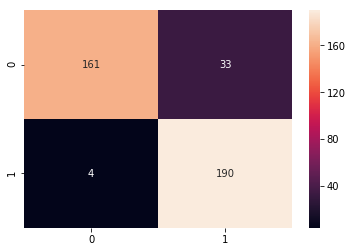

In [8]:
cm = metrics.confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [9]:
print(metrics.classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.83      0.90       194
          1       0.85      0.98      0.91       194

avg / total       0.91      0.90      0.90       388



### 导出 Estimator 模型

In [13]:
estmodel_save_dir = './est_model_saved'

In [14]:
ftmodel = FTConvLearner(batches.class_indices, init=False)
ftmodel.load(model_save_dir)

In [15]:
est_model = ftmodel.to_estimator()
utils._export_estimator(est_model, name=ftmodel.input_name, 
                        shape=ftmodel.shape, save_dir=estmodel_save_dir)

INFO:tensorflow:Using the Keras model provided.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './est_models/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6e3f77a080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tensorflo